# HW3 Spring2024 Vyom Raval

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
str_mat = '/Users/riekelabbackup/Library/CloudStorage/OneDrive-UW/UW/Classes/Sp2024/NEURO511A Vision/HW/HW3/mock_neuraldata.mat'
data = loadmat(str_mat)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'neuron_group1', 'neuron_group2', 'neuron_group3'])


9 stimuli, 5 positions, 15 neurons

In [4]:
print(data['neuron_group1'].shape)
n_stim, n_pos, n_neurons = data['neuron_group1'].shape

(9, 5, 15)


## Q1-3

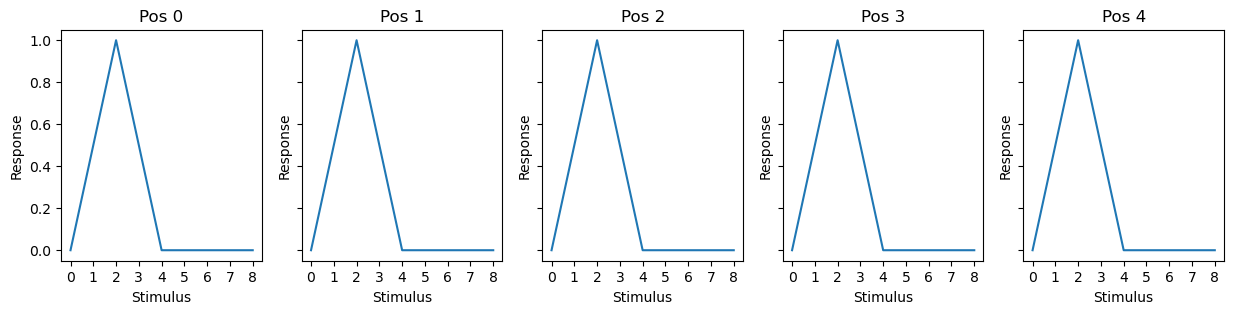

In [9]:
str_key = 'neuron_group1'
neuron_idx = 6
f, axs = plt.subplots(ncols=n_pos, figsize=(n_pos*3, 3), sharey=True)
for pos_idx in range(n_pos):
    ax = axs[pos_idx]
    resp = data[str_key][:, pos_idx, neuron_idx]
    ax.plot(resp)
    ax.set_title(f'Pos {pos_idx}')
    ax.set_xlabel('Stimulus')
    ax.set_ylabel('Response')
    ax.set_xticks(np.arange(0, n_stim))


This neuron has a sharp tuning for stimulus identity with ahigh preference for stimulus index 2. This tuning does not change across position.

Text(0.5, 1.0, 'Neuron 7')

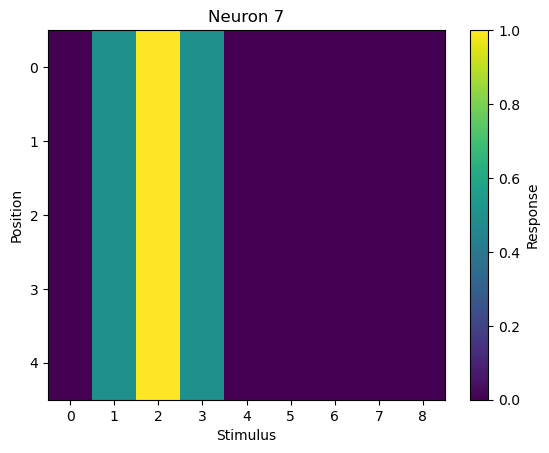

In [19]:
plt.imshow(data[str_key][:, :, 6].T, aspect='auto')
plt.xlabel('Stimulus')
plt.ylabel('Position')
plt.colorbar(label='Response')
plt.title('Neuron 7')

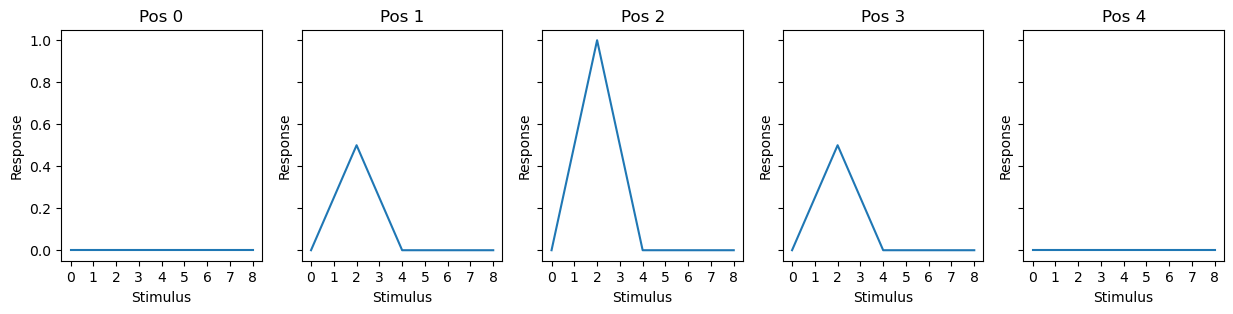

In [20]:
str_key = 'neuron_group2'
neuron_idx = 6
f, axs = plt.subplots(ncols=n_pos, figsize=(n_pos*3, 3), sharey=True)
for pos_idx in range(n_pos):
    ax = axs[pos_idx]
    resp = data[str_key][:, pos_idx, neuron_idx]
    ax.plot(resp)
    ax.set_title(f'Pos {pos_idx}')
    ax.set_xlabel('Stimulus')
    ax.set_ylabel('Response')
    ax.set_xticks(np.arange(0, n_stim))


Stimulus tuning for this neuron scales with position, with the peak and shape remaining the same.

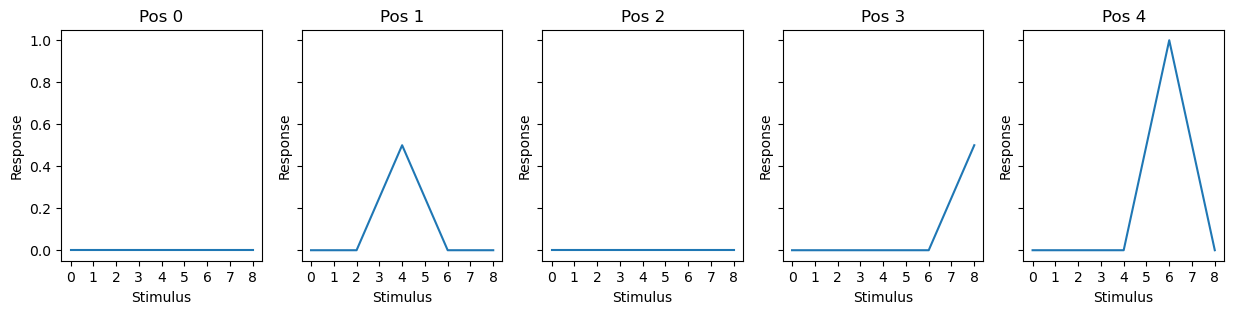

In [21]:
str_key = 'neuron_group3'
neuron_idx = 5
f, axs = plt.subplots(ncols=n_pos, figsize=(n_pos*3, 3), sharey=True)
for pos_idx in range(n_pos):
    ax = axs[pos_idx]
    resp = data[str_key][:, pos_idx, neuron_idx]
    ax.plot(resp)
    ax.set_title(f'Pos {pos_idx}')
    ax.set_xlabel('Stimulus')
    ax.set_ylabel('Response')
    ax.set_xticks(np.arange(0, n_stim))

Text(0.5, 1.0, 'Neuron 5 neuron_group3')

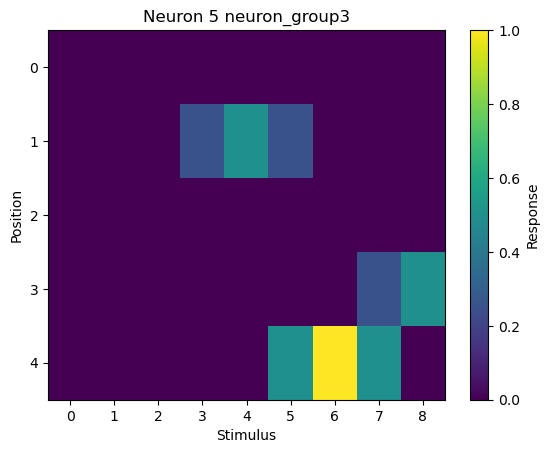

In [22]:
plt.imshow(data[str_key][:, :, neuron_idx].T, aspect='auto')
plt.xlabel('Stimulus')
plt.ylabel('Position')
plt.colorbar(label='Response')
plt.title(f'Neuron {neuron_idx} {str_key}')

Stimulus tuning changes both magnitude and peak with position.

## Q4

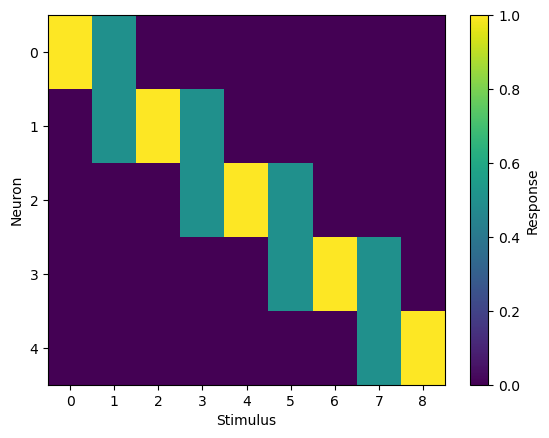

In [46]:
pos_idx = 0
str_key = 'neuron_group1'
neurons = np.arange(5)

plt.imshow(data[str_key][:, pos_idx, neurons].T, aspect='auto')
plt.xlabel('Stimulus')
plt.ylabel('Neuron')
plt.colorbar(label='Response')

Yes this population of neurons can decode stimulus identity as each stimulus has a unique pattern across the 5 neurons.

If neuron 3 (idx 2) is inactivated, I will still be able to decode stimulus 5 (idx 4). Any single neuron can be inactivated and perfect decoding retained as there is one free available coding state of all neurons with 0 response.

## Q5

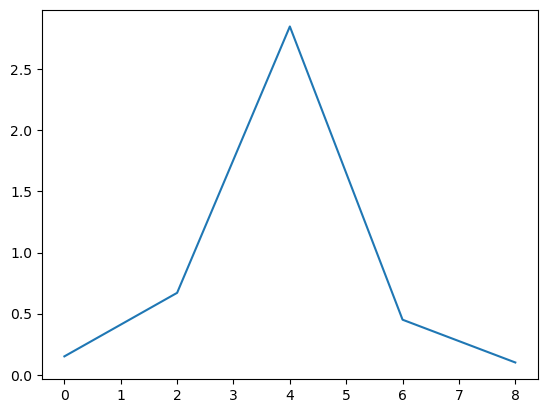

In [35]:
ls_resps = [0.05,0.2,0.95,0.15,0.0,0.0,0.22,1.0,0.2,0.1,0.1,0.25,0.9,0.1,0.0]
str_key = 'neuron_group1'
tfs = data[str_key][:, 0, :]
model = np.zeros(tfs.shape)#np.dot(tfs, ls_resps)
for i, resp in enumerate(ls_resps):
    model[:, i] = tfs[:, i] * resp
plt.plot(model.sum(axis=1))

Yes the peak matches what I expect from Neuron 3 having highest response and its tuning curve peak being at stimulus idx 4.

## Q6

Text(0, 0.5, 'Stimulus')

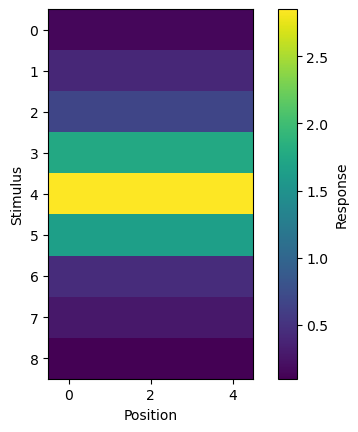

In [40]:
ls_resps = [0.05,0.2,0.95,0.15,0.0,0.0,0.22,1.0,0.2,0.1,0.1,0.25,0.9,0.1,0.0]
str_key = 'neuron_group1'
tfs = data[str_key]
model = np.zeros(tfs.shape)
for i, resp in enumerate(ls_resps):
    model[:, :, i] = tfs[:, :, i] * resp
plt.imshow(model.sum(axis=2))
plt.colorbar(label='Response')
plt.xlabel('Position')
plt.ylabel('Stimulus')

I can decode stimulus identity but not position as neurons in this group have the same stimulus tuning across all positions, i.e., they are position invariant and have thrown away position information.

## Q7

Text(0, 0.5, 'Stimulus')

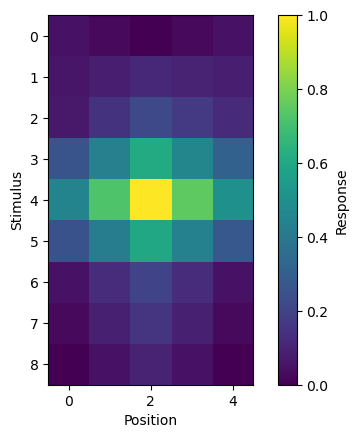

In [47]:
ls_resps = [0.05,0.07,0.45,0.05,0.0,0.0,0.22,1.0,0.2,0.1,0.05,0.12,0.5,0.05,0.0]
str_key = 'neuron_group2'

tfs = data[str_key]
model = np.zeros(tfs.shape)
for i, resp in enumerate(ls_resps):
    model[:, :, i] = tfs[:, :, i] * resp
plt.imshow(model.sum(axis=2))
plt.colorbar(label='Response')
plt.xlabel('Position')
plt.ylabel('Stimulus')

This time I can decode both position and identity. This is because group2 neurons scale their tuning with position, i.e., are not position invariant.

## Q8

Text(0, 0.5, 'Stimulus')

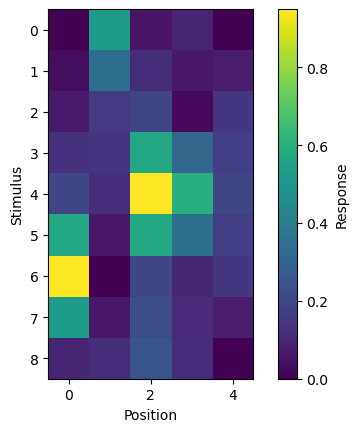

In [48]:
# Convert above responses to a list
ls_resps = [0.25,0.2,0.0,0.05,0.1,0.15,0.1,0.0,0.0,0.07,0.95,0.2,0.15,0.1,0.0]

str_key = 'neuron_group3'

tfs = data[str_key]
model = np.zeros(tfs.shape)
for i, resp in enumerate(ls_resps):
    model[:, :, i] = tfs[:, :, i] * resp
plt.imshow(model.sum(axis=2))
plt.colorbar(label='Response')
plt.xlabel('Position')
plt.ylabel('Stimulus')

I can't decode stimulus identity and position as there are 2 most answers with equal high likelihood. Neurons in this group change peak as well as amplitude of their tuning curve with position, creating the possibility of multiple stimulus-position combinations that generate the same population response.

If the stimulus was in position 1, I would decode identity 7 (idx6). If position 2, then stimulus 1 (idx 0).

## Q9

I learned that simultaneous decoding of stimulus and position cannot involve position invariant responses as with group1. Group2 works as their stimulus preference curves stay the same shape but scale with position. Group3 varies tuning with position, creating the possibility of multiple stimulus-position combinations eliciting the same population response. In other words, position and stimulus are covarying and not separable for these neurons.